## Classification - Customer Chrun Prediction

Dataset Link: https://www.kaggle.com/blastchar/telco-customer-churn/download

### Features Description:

The dataset contains of 21 features
- customerID : The Customer ID of the customer and it is unique
- gender : The Gender of the customer
- SeniorCitizen : To say whether the customer is the SeniorCitizen or not
- Partner          : Whether the customer is a Partner or not
- Dependents       : Whether the customer has a Dependents or not
- tenure           : Tenure or how long the customer is with the company/firm
- PhoneService     : Whether the customer has a PhoneService or not
- MultipleLines    : Whether the customer has a MultipleLines or not
- InternetService  : Whether the customer has a InternetService of DSL/Fiber Optic or not
- OnlineSecurity   : Whether the customer has a OnlineSecurity or not
- OnlineBackup     : Whether the customer has a OnlineBackup or not
- DeviceProtection : Whether the customer has a DeviceProtection or not
- TechSupport      : Whether the customer has opted for a TechSupport or not
- StreamingTV      : Whether the customer has opted for a StreamingTV or not
- StreamingMovies  : Whether the customer has opted for StreamingMovies or not
- Contract         : Type of contract the customer is on
- PaperlessBilling : Whether the customer has opted for PaperlessBilling or not
- PaymentMethod    : Payment method used by the customer
- MonthlyCharges   : MonthlyCharges paid by the customer
- TotalCharges     : Total charges paid by the customer
- Chrun            : Indicated whether the customer has chrunned or not and it is the Target Variable

### Project Objective:
- The objective of the project is to classify whether the customer will Chrun or not for the Telcom Company.

## Importing libraries

In [17]:
import numpy as np 
import pandas as pd
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,8 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

### Reading Data

In [18]:
### reading the data from the csv file and loading into a dataframe 
telcom_df = pd.read_csv("Telecom_Customer_Churn_prediction.csv")
#Displaying the first 5 rows to get an idea on what type of feature are we dealing with
telcom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
### No of rows: 7043 , No of Cols: 21
telcom_df.shape

(7043, 21)

In [20]:
## From the stats of the data it is clear that the dataset has only two numerical features(tenure,MonthlyCharges). 
## So we have to do data transformation such as one hot encoding,Mapping the values etc.
telcom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7022.000000,7043.000000
mean,0.162147,32.340644,64.761692
std,0.368612,24.565824,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### From the info() we can clearly see that TotalCharges column is being marked as object type eventhough it contains numbers. We can start with changing them to float values to begin with the data manipualation

In [21]:
telcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7022 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7038 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7020 non-null object
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

### Percentage of Missing values on each column

In [22]:
Missing_Values=(telcom_df.isna().sum(axis=0))
Missing_Values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              21
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     5
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        23
Churn                0
dtype: int64

In [23]:
Missing_values_percent=(telcom_df.isna().sum(axis=0)/len(telcom_df))*100
Missing_values_percent

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.298168
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.070992
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.326565
Churn               0.000000
dtype: float64

### The following can be done to handle the missing values in the dataset.
* It can be seen that % of data missing in the device protection column is only 7% (5 Values) so these values can be dropped. 
* The missing values in the Total charges and Tenure has to be handled using imputation since the missing value percentage is more than 10%

# Data Transformation

In [24]:
### Replacing the blank values of Total Charges Column with nan's and convert the type from str to float
telcom_df['TotalCharges'] = telcom_df["TotalCharges"].replace(" ",np.nan)
telcom_df["TotalCharges"] = telcom_df["TotalCharges"].astype(float)

### From the data we can clearly see that product of Monthly charges and Tenure yield the values in the Total Charges column

In [25]:
### iterrows helps us to loop through the dataframe row by row
### Replacing the nan with the product of Monthly charges and tenure to arrive at the Total charges
for idx, row in telcom_df.iterrows():
    if(pd.isna(row['TotalCharges'])):
        telcom_df['TotalCharges'][idx]= row['MonthlyCharges'] * row ['tenure']

### To derive the value for Tenure, divide the Total charges by Monthly Charges

In [26]:
telcom_df['tenure'] = telcom_df["tenure"].replace(" ",np.nan)
for idx, row in telcom_df.iterrows():
    if(pd.isna(row['tenure'])):
        telcom_df['tenure'][idx]= row['TotalCharges']/row['MonthlyCharges']

In [27]:
(telcom_df.isna().sum(axis=0)/len(telcom_df))*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.070992
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
Churn               0.000000
dtype: float64

### Removing the nan from the Device protection column

In [28]:
### No of rows before dropping the 5 nan rows from the device protection
telcom_df.shape[0]

7043

In [29]:
telcom_df.dropna(inplace=True)

In [30]:
### No of rows after dropping the 5 nan rows from the device protection
telcom_df.shape[0]

7038

In [31]:
telcom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7038 non-null object
gender              7038 non-null object
SeniorCitizen       7038 non-null int64
Partner             7038 non-null object
Dependents          7038 non-null object
tenure              7038 non-null float64
PhoneService        7038 non-null object
MultipleLines       7038 non-null object
InternetService     7038 non-null object
OnlineSecurity      7038 non-null object
OnlineBackup        7038 non-null object
DeviceProtection    7038 non-null object
TechSupport         7038 non-null object
StreamingTV         7038 non-null object
StreamingMovies     7038 non-null object
Contract            7038 non-null object
PaperlessBilling    7038 non-null object
PaymentMethod       7038 non-null object
MonthlyCharges      7038 non-null float64
TotalCharges        7038 non-null float64
Churn               7038 non-null object
dtypes: float64(3), int64(1), 

In [32]:
### It is observed from the dataset there are many columns having 'No' and 'No Internet service'. 
### Replacing 'No Internet service' with 'No'. Since it means the same
for col in telcom_df.columns:
    if col not in ['tenure','customerID','MonthlyCharges','TotalCharges']:
        print('The no of unique values in {} is:{}'.format(col,telcom_df[col].unique()))

The no of unique values in gender is:['Female' 'Male']
The no of unique values in SeniorCitizen is:[0 1]
The no of unique values in Partner is:['Yes' 'No']
The no of unique values in Dependents is:['No' 'Yes']
The no of unique values in PhoneService is:['No' 'Yes']
The no of unique values in MultipleLines is:['No phone service' 'No' 'Yes']
The no of unique values in InternetService is:['DSL' 'Fiber optic' 'No']
The no of unique values in OnlineSecurity is:['No' 'Yes' 'No internet service']
The no of unique values in OnlineBackup is:['Yes' 'No' 'No internet service']
The no of unique values in DeviceProtection is:['No' 'Yes' 'No internet service']
The no of unique values in TechSupport is:['No' 'Yes' 'No internet service']
The no of unique values in StreamingTV is:['No' 'Yes' 'No internet service']
The no of unique values in StreamingMovies is:['No' 'Yes' 'No internet service']
The no of unique values in Contract is:['Month-to-month' 'One year' 'Two year']
The no of unique values in Pap

In [33]:
#replace No Internet Services to No for the following columns
rep_cols = ['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in rep_cols : 
    telcom_df[i]  = telcom_df[i].replace({'No internet service' : 'No'})
    

telcom_df['MultipleLines']  = telcom_df['MultipleLines'].replace({'No phone service' : 'No'})
    
# #replace values yes and no as 1 and 0 in the senior citizen column
# telcom_df["SeniorCitizen"] = telcom_df["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Grouping the Tenure and create a seperate column to analyse the impact of tenure towards the  customer churn
def tenure_grouping(telcom_df) :
    
    if telcom_df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom_df["tenure"] > 12) & (telcom_df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom_df["tenure"] > 24) & (telcom_df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom_df["tenure"] > 48) & (telcom_df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom_df["tenure"] > 60 :
        return "Tenure_gt_60"
telcom_df["tenure_group"] = telcom_df.apply(lambda telcom_df:tenure_grouping(telcom_df),axis = 1)


#Separating churn and non churn customers
churn     = telcom_df[telcom_df["Churn"] == "Yes"]
not_churn = telcom_df[telcom_df["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
catagorical_cols   = telcom_df.nunique()[telcom_df.nunique() < 6].keys().tolist()
catagorical_cols   = [x for x in catagorical_cols if x not in target_col]
numeric_col   = [x for x in telcom_df.columns if x not in catagorical_cols + target_col + Id_col]

In [34]:
### Coluumn values after replacement
for col in telcom_df.columns:
    if col not in ['tenure','customerID','MonthlyCharges','TotalCharges']:
        print('The no of unique values in {} is:{}'.format(col,telcom_df[col].unique()))

The no of unique values in gender is:['Female' 'Male']
The no of unique values in SeniorCitizen is:[0 1]
The no of unique values in Partner is:['Yes' 'No']
The no of unique values in Dependents is:['No' 'Yes']
The no of unique values in PhoneService is:['No' 'Yes']
The no of unique values in MultipleLines is:['No' 'Yes']
The no of unique values in InternetService is:['DSL' 'Fiber optic' 'No']
The no of unique values in OnlineSecurity is:['No' 'Yes']
The no of unique values in OnlineBackup is:['Yes' 'No']
The no of unique values in DeviceProtection is:['No' 'Yes']
The no of unique values in TechSupport is:['No' 'Yes']
The no of unique values in StreamingTV is:['No' 'Yes']
The no of unique values in StreamingMovies is:['No' 'Yes']
The no of unique values in Contract is:['Month-to-month' 'One year' 'Two year']
The no of unique values in PaperlessBilling is:['Yes' 'No']
The no of unique values in PaymentMethod is:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card 

In [35]:
### The Categorical columns present in the dataset
catagorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [36]:
### Numeric columns present in the dataset
numeric_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [37]:
### All the values in the CustomerID column is unique so this columns can be set as an index for the dataframe
print(f'The No of unique values in the CustomerID columns is:{len(telcom_df.customerID.unique())}')
telcom_df=telcom_df.set_index('customerID')
telcom_df.head(2)

The No of unique values in the CustomerID columns is:7038


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48


# Exploratory Data Analysis

## Churn Distribution in Data

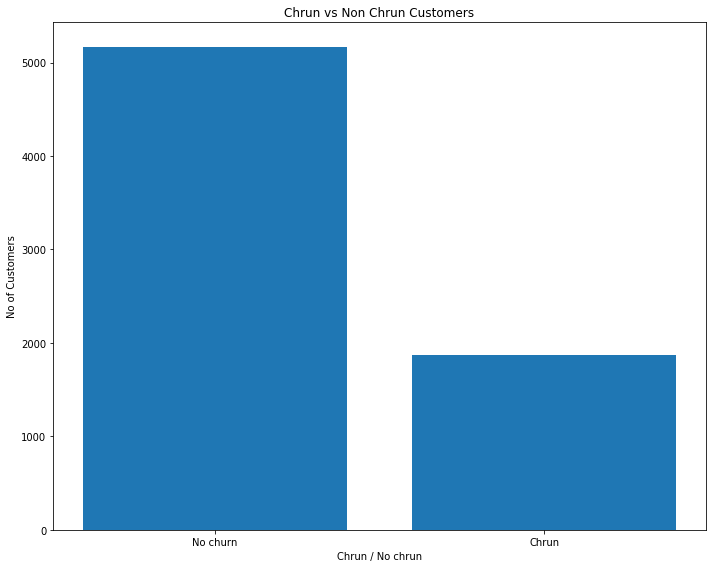

In [38]:
#labels
labels = telcom_df["Churn"].value_counts().keys().tolist()
#values
values = telcom_df["Churn"].value_counts().values.tolist()

plt.bar(labels,values)
plt.title('Chrun vs Non Chrun Customers')
plt.xticks([1,0],labels=['Chrun','No churn'])
plt.xlabel('Chrun / No chrun')
plt.ylabel('No of Customers')
plt.tight_layout()
plt.show()

### The No of Non chrun customers is more than the chrun customers. This clearly indicates that there is a class imbalance in this dataset. Will handle class imbalance later in this notebook using SMOTE

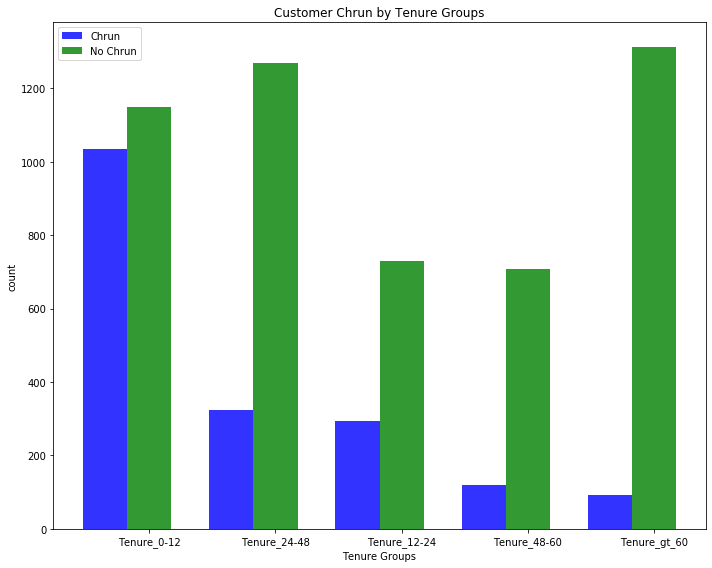

In [39]:
# Customer Chrun by Tenure Groups

tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
#tg_ch=tg_ch.sort_values(by='count')
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

###Re-ordering the non-Chrun dataframe
tg_nch1=pd.DataFrame(columns=['tenure_group','count'],index=[0,1,2,3,4])
tg_nch1.loc[0]=tg_nch.loc[2]
tg_nch1.loc[1]=tg_nch.loc[1]
tg_nch1.loc[2]=tg_nch.loc[3]
tg_nch1.loc[3]=tg_nch.loc[4]
tg_nch1.loc[4]=tg_nch.loc[0]
tg_nch1

# create plot
n_groups=5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tg_ch['count'], bar_width,
alpha=opacity,
color='b',
label='Chrun')

rects2 = plt.bar(index + bar_width, tg_nch1['count'], bar_width,
alpha=opacity,
color='g',
label='No Chrun')

plt.xlabel('Tenure Groups')
plt.ylabel('count')
plt.title('Customer Chrun by Tenure Groups')
plt.xticks(index + bar_width, ('Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_48-60' , 'Tenure_gt_60'))
plt.legend()
plt.tight_layout()
plt.show()

### From the above graph it can be seen clearly that customers don't chrun if they are staying with the same vendor for a long time i.e. Tenure > 60 group has significantly less no of customer chrun than Tenure group 0-12

In [40]:
telcom_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                94
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6524
Churn                  2
tenure_group           5
dtype: int64

### MinMax Scaler: MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#customer id col
Id_col  = ['customerID']
#Target columns
target_col = ["Churn"]

#categorical columns
catagorical_cols   = telcom_df.nunique()[telcom_df.nunique() < 6].keys().tolist()
catagorical_cols   = [x for x in catagorical_cols if x not in target_col]
#numerical columns
numeric_col   = [x for x in telcom_df.columns if x not in catagorical_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom_df.nunique()[telcom_df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in catagorical_cols if i not in bin_cols]


#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom_df[i] = le.fit_transform(telcom_df[i])

#Duplicating columns for multi value columns
telcom_df = pd.get_dummies(data = telcom_df,columns = multi_cols )


#Scaling Numerical columns
scaler = MinMaxScaler()
scaled = scaler.fit_transform(telcom_df[numeric_col])
scaled = pd.DataFrame(scaled,columns=numeric_col,index=telcom_df.index)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom_df.copy()
telcom_df = telcom_df.drop(columns = numeric_col,axis = 1)
telcom_df = telcom_df.merge(scaled,left_index=True,right_index=True,how = "left")

In [42]:
for col in telcom_df.columns:
    if col not in ['tenure','customerID','MonthlyCharges','TotalCharges']:
        print('The no of unique values in {} is:{}'.format(col,telcom_df[col].unique()))

The no of unique values in gender is:[0 1]
The no of unique values in SeniorCitizen is:[0 1]
The no of unique values in Partner is:[1 0]
The no of unique values in Dependents is:[0 1]
The no of unique values in PhoneService is:[0 1]
The no of unique values in MultipleLines is:[0 1]
The no of unique values in OnlineSecurity is:[0 1]
The no of unique values in OnlineBackup is:[1 0]
The no of unique values in DeviceProtection is:[0 1]
The no of unique values in TechSupport is:[0 1]
The no of unique values in StreamingTV is:[0 1]
The no of unique values in StreamingMovies is:[0 1]
The no of unique values in PaperlessBilling is:[1 0]
The no of unique values in Churn is:[0 1]
The no of unique values in InternetService_DSL is:[1 0]
The no of unique values in InternetService_Fiber optic is:[0 1]
The no of unique values in InternetService_No is:[0 1]
The no of unique values in Contract_Month-to-month is:[1 0]
The no of unique values in Contract_One year is:[0 1]
The no of unique values in Contr

### Heatmap

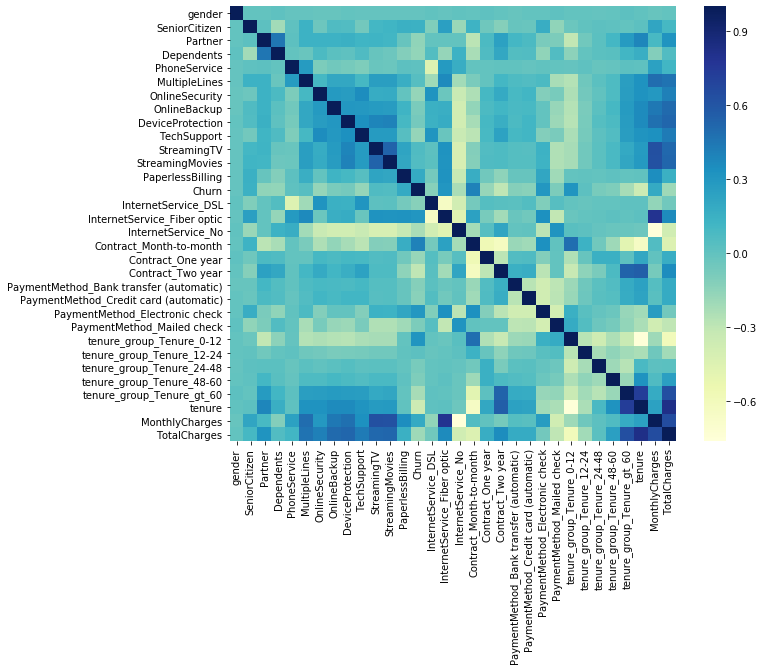

In [43]:
correlation = telcom_df.corr()
sns.heatmap(correlation, cmap="YlGnBu",annot=False)

### Monthly charges,Tenure Group 0-12,Contract Month to month have a good correlation with the target variable

In [44]:
telcom_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.013889,0.115423,0.003437
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.472222,0.385075,0.217564


### Train Test split

In [45]:
from sklearn.model_selection import train_test_split

X = telcom_df.drop('Churn',axis=1)
Y = telcom_df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = .25,random_state = 0)

### Balancing the Training data

### Since there is a class imbalance issue in this dataset as identified early during the EDA phase. We have used SMOTE to the Training data to balance the no of churn and non churn customers by synthesing more minority samples from the existing training data.

In [46]:
## No of chrun and non chrun customres before applying smote
y_train.value_counts()

0    3876
1    1402
Name: Churn, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote
os = SMOTE(random_state = 0)
X_train_smote,Y_train_smote = os.fit_sample(X_train,y_train)
X_train_smote = pd.DataFrame(data = X_train_smote,columns=X_train.columns)
Y_train_smote = pd.DataFrame(data = Y_train_smote,columns=['Chrun'])
###

Using TensorFlow backend.


In [48]:
### No of chrun and non chrun customers after applying SMOTE
Y_train_smote['Chrun'].value_counts()

1    3876
0    3876
Name: Chrun, dtype: int64

### Now we have have equal no of churn and non churn customers in the training data. With this training data we can train on various models and arrive at the best model based on the evaluation metric chosen and performance of the models on the unseen data(test set)

## Classification: Models

The following classifiers are implemented in the next part:
* K Nearest Neighbor
* Logistic Regression
* Linear SVC
* Kernalized SVC - Linear
* Kernalized SVC - rbf
* Kernalized SVC - poly
* Decision Tree    


## KNN classifier

In [55]:
### Importing necessary Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [38]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(5, 10)}
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5)
grid_knn.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
print("Best Parameters for KNN classifier from grid search: ", grid_knn.best_params_)

Best Parameters for KNN classifier from grid search:  {'n_neighbors': 6}


In [40]:
knneg = KNeighborsClassifier(n_neighbors=6)
knneg.fit(X_train_smote, Y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [41]:
cross_val_scores_knn = cross_val_score(knneg,X_train_smote, Y_train_smote,cv=5)

In [42]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_knn))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_knn)))

The Cross validation scores for the training set is:[0.78092784 0.76967742 0.81354839 0.82322581 0.83870968]
The Mean Cross val score for training set is:0.8052178250748254


In [43]:
knneg_predict = knneg.predict(X_test)
knneg_train_predict=knneg.predict(X_train_smote)
print(classification_report(y_test,knneg_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,knneg_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,knneg_predict)))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1295
           1       0.50      0.66      0.57       465

    accuracy                           0.73      1760
   macro avg       0.68      0.71      0.69      1760
weighted avg       0.76      0.73      0.74      1760

The Train score is:0.8637770897832817
The Test score is:0.7346590909090909


In [44]:
train_score_list = []
test_score_list = []
k_val = [5,6,7,8,9,10]

for k in k_val: 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_smote, Y_train_smote)
    train_score_list.append(knn_model.score(X_train_smote, Y_train_smote))
    test_score_list.append(knn_model.score(X_test, y_test))

Text(0.5, 0, 'K')

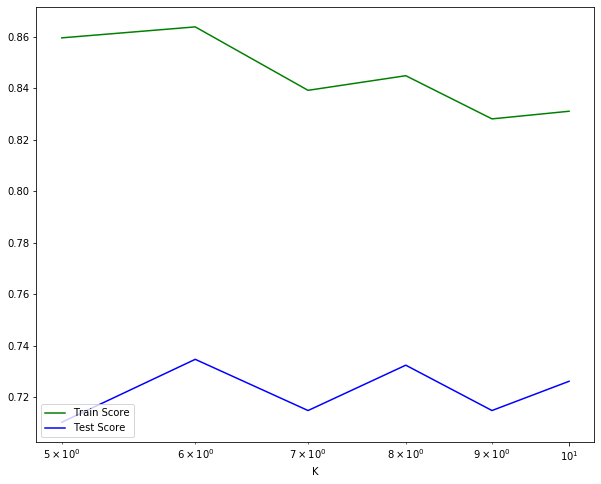

In [45]:
plt.plot(k_val, train_score_list, c = 'g', label = 'Train Score')
plt.plot(k_val, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('K')

### The KNN model with K=6 Clearly overfits the data

## Logistic regression:

In [46]:
###Importing Necessary package
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(penalty='l2',random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(logreg,param_grid,cv=5)
grid_log_reg.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
print("Best Parameters for Logistic Regression from grid search: ", grid_log_reg.best_params_)

Best Parameters for Logistic Regression from grid search:  {'C': 100}


In [49]:
logit = LogisticRegression(penalty = 'l2', C = 100, random_state=0)
logit.fit(X_train_smote, Y_train_smote)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
cross_val_scores_log_reg = cross_val_score(logit,X_train_smote, Y_train_smote,cv=5)

In [51]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_log_reg))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_log_reg)))

The Cross validation scores for the training set is:[0.77448454 0.74193548 0.78516129 0.74967742 0.78645161]
The Mean Cross val score for training set is:0.7675420685068175


In [52]:
logit_predict = logit.predict(X_test)
logit_train_predict=logit.predict(X_train_smote)
print(classification_report(y_test,logit_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,logit_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,logit_predict)))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1295
           1       0.54      0.82      0.65       465

    accuracy                           0.77      1760
   macro avg       0.73      0.78      0.74      1760
weighted avg       0.82      0.77      0.78      1760

The Train score is:0.7697368421052632
The Test score is:0.76875


In [53]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LogisticRegression(C=alpha, random_state=0)
    model.fit(X_train_smote, Y_train_smote)
    train_score_list.append(model.score(X_train_smote, Y_train_smote))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5, 0, 'C')

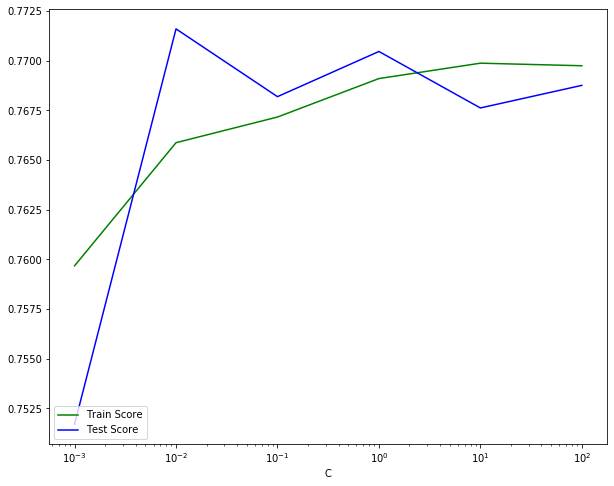

In [54]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

### The Logistic Regression model with C=100 generalizes well for the dataset. This can be the contender for the best model

## Linear SVC

In [57]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5)
grid_svc_lin.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
print("Best Parameters for Linear SVC from grid search: ", grid_svc_lin.best_params_)

Best Parameters for Linear SVC from grid search:  {'C': 1}


In [59]:
svc_lin_mod = LinearSVC(C=1)
svc_lin_mod.fit(X_train_smote, Y_train_smote)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [60]:
cross_val_scores_svc_lin= cross_val_score(svc_lin_mod,X_train_smote, Y_train_smote,cv=5)

In [61]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_svc_lin))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_svc_lin)))

The Cross validation scores for the training set is:[0.76997423 0.74322581 0.78129032 0.74451613 0.78903226]
The Mean Cross val score for training set is:0.7656077485866313


In [62]:
svc_lin_predict = svc_lin_mod.predict(X_test)
svc_lin_train_predict=svc_lin_mod.predict(X_train_smote)
print(classification_report(y_test,svc_lin_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,svc_lin_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,svc_lin_predict)))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1295
           1       0.54      0.82      0.65       465

    accuracy                           0.77      1760
   macro avg       0.73      0.79      0.74      1760
weighted avg       0.82      0.77      0.78      1760

The Train score is:0.7688338493292054
The Test score is:0.7681818181818182


In [63]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model_lin_svc = LinearSVC(C=alpha, random_state=0)
    model_lin_svc.fit(X_train_smote, Y_train_smote)
    train_score_list.append(model_lin_svc.score(X_train_smote, Y_train_smote))
    test_score_list.append(model_lin_svc.score(X_test, y_test))

Text(0.5, 0, 'C')

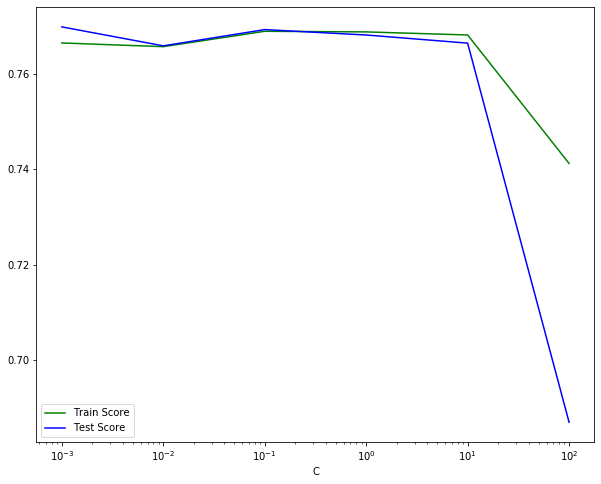

In [64]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

### The Linear SVC model with C=1 generalizes well for the dataset. This can be the contender for the best model

## Kernalized SVC - Linear

In [50]:
from sklearn.svm import SVC
lin_svc = SVC(kernel='linear')
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_linsvc = GridSearchCV(lin_svc, param_grid, cv = 5)
grid_linsvc.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
print("Best Parameters for Kernalized Linear SVC from grid search: ", grid_linsvc.best_params_)

Best Parameters for Kernalized Linear SVC from grid search:  {'C': 1}


In [67]:
linsvc_mod = SVC(kernel='linear',C=1)
linsvc_mod.fit(X_train_smote, Y_train_smote)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
cross_val_scores_linsvc= cross_val_score(linsvc_mod,X_train_smote, Y_train_smote,cv=5)

In [70]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_linsvc))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_linsvc)))

The Cross validation scores for the training set is:[0.76868557 0.74903226 0.76387097 0.74451613 0.77548387]
The Mean Cross val score for training set is:0.7603177585633522


In [71]:
linsvc_predict = linsvc_mod.predict(X_test)
linsvc_train_predict = linsvc_mod.predict(X_train_smote)
print(classification_report(y_test,linsvc_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,linsvc_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,linsvc_predict)))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1295
           1       0.52      0.83      0.64       465

    accuracy                           0.75      1760
   macro avg       0.72      0.78      0.73      1760
weighted avg       0.82      0.75      0.77      1760

The Train score is:0.7640608875128999
The Test score is:0.7539772727272728


In [72]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    linsvc_mod_range = SVC(kernel='linear',C=alpha)
    linsvc_mod_range.fit(X_train_smote, Y_train_smote)
    train_score_list.append(linsvc_mod_range.score(X_train_smote, Y_train_smote))
    test_score_list.append(linsvc_mod_range.score(X_test, y_test))

Text(0.5, 0, 'C')

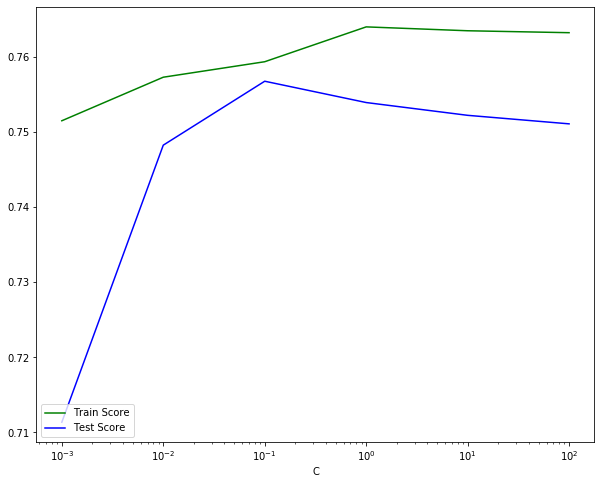

In [73]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

### The Kernalized Linear SVC model with C=1 generalizes well for the dataset. This can be the contender for the best model

## Kernalized SVC - rbf

In [51]:
svc_rbf = SVC(kernel='rbf')
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1]}

grid_svc_rbf = GridSearchCV(svc_rbf, param_grid, cv = 5)
grid_svc_rbf.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print("Best Parameters for Kernalized rbf SVC from grid search: ", grid_svc_rbf.best_params_)

Best Parameters for Kernalized rbf SVC from grid search:  {'C': 100, 'gamma': 1}


In [53]:
svc_rbf_mod = SVC(kernel='rbf',C=100,gamma=1)
svc_rbf_mod.fit(X_train_smote, Y_train_smote)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
cross_val_scores_svc_rbf= cross_val_score(svc_rbf_mod,X_train_smote, Y_train_smote,cv=5)

In [57]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_svc_rbf))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_svc_rbf)))

The Cross validation scores for the training set is:[0.83762887 0.83741935 0.91870968 0.90129032 0.92645161]
The Mean Cross val score for training set is:0.8842999667442635


In [58]:
svc_rbf_predict = svc_rbf_mod.predict(X_test)
svc_rbf_predict_train=svc_rbf_mod.predict(X_train_smote)
print(classification_report(y_test,svc_rbf_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,svc_rbf_predict_train)))
print('The Test score is:{}'.format(accuracy_score(y_test,svc_rbf_predict)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1295
           1       0.56      0.46      0.51       465

    accuracy                           0.76      1760
   macro avg       0.69      0.67      0.68      1760
weighted avg       0.75      0.76      0.76      1760

The Train score is:0.9691692466460269
The Test score is:0.7636363636363637


In [59]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    svc_rbf_mod_range = SVC(kernel='rbf',C=alpha,gamma=1)
    svc_rbf_mod_range.fit(X_train_smote, Y_train_smote)
    train_score_list.append(svc_rbf_mod_range.score(X_train_smote, Y_train_smote))
    test_score_list.append(svc_rbf_mod_range.score(X_test, y_test))

Text(0.5, 0, 'C')

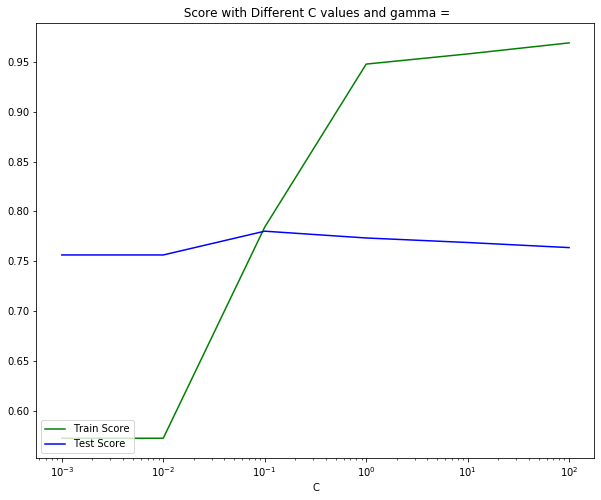

In [60]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

### The Kernalized rbf SVC model with 'C': 100, 'gamma': 1 overfits the dataset.

## Kernalized SVC - Poly

In [82]:
svc_poly = SVC(kernel='poly')
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'degree':[1,2,3,4,5]}

grid_svc_poly = GridSearchCV(svc_poly, param_grid, cv = 5)
grid_svc_poly.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
print("Best Parameters for Kernalized Poly SVC from grid search: ", grid_svc_poly.best_params_)

Best Parameters for Kernalized Poly SVC from grid search:  {'C': 100, 'degree': 3}


In [84]:
svc_poly_mod = SVC(kernel='poly',C=100,degree=3)
svc_poly_mod.fit(X_train_smote, Y_train_smote)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [85]:
cross_val_scores_svc_poly= cross_val_score(svc_poly_mod,X_train_smote, Y_train_smote,cv=5)

In [86]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_svc_poly))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_svc_poly)))

The Cross validation scores for the training set is:[0.77770619 0.77354839 0.82967742 0.81612903 0.83225806]
The Mean Cross val score for training set is:0.8058638177585633


In [87]:
svc_poly_predict = svc_poly_mod.predict(X_test)
svc_poly_predict_train=svc_poly_mod.predict(X_train_smote)
print(classification_report(y_test,svc_poly_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,svc_poly_predict_train)))
print('The Test score is:{}'.format(accuracy_score(y_test,svc_poly_predict)))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1295
           1       0.53      0.75      0.62       465

    accuracy                           0.76      1760
   macro avg       0.71      0.75      0.72      1760
weighted avg       0.80      0.76      0.77      1760

The Train score is:0.8501031991744066
The Test score is:0.7556818181818182


In [88]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    svc_poly_mod_range = SVC(kernel='poly',C=alpha,degree=3)
    svc_poly_mod_range.fit(X_train_smote, Y_train_smote)
    train_score_list.append(svc_poly_mod_range.score(X_train_smote, Y_train_smote))
    test_score_list.append(svc_poly_mod_range.score(X_test, y_test))

Text(0.5, 0, 'C')

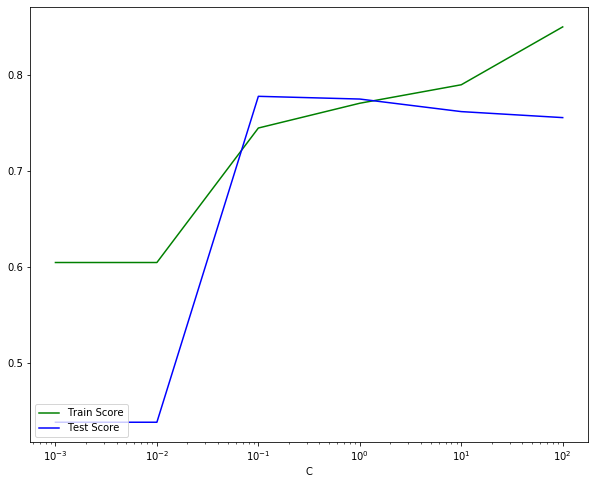

In [89]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

### The Kernalized poly SVC model with 'C': 100, 'degree': 3 overfits the dataset.

# Decision Tree

In [90]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(1, 20)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv = 5)
grid_tree.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
     

In [91]:
print("Best Parameters for decision tree from grid search: ", grid_tree.best_params_)

Best Parameters for decision tree from grid search:  {'max_depth': 11}


In [92]:
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
dtree.fit(X_train_smote, Y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [93]:
cross_val_scores_dtree= cross_val_score(dtree,X_train_smote, Y_train_smote,cv=5)

In [94]:
print('The Cross validation scores for the training set is:{}'.format(cross_val_scores_dtree))
print('The Mean Cross val score for training set is:{}'.format(np.mean(cross_val_scores_dtree)))

The Cross validation scores for the training set is:[0.72938144 0.74516129 0.83612903 0.82064516 0.83677419]
The Mean Cross val score for training set is:0.7936182241436648


In [95]:
dtree_predict = dtree.predict(X_test)
dtree_predict_train=dtree.predict(X_train_smote)
print(classification_report(y_test,dtree_predict))
print('The Train score is:{}'.format(accuracy_score(Y_train_smote,dtree_predict_train)))
print('The Test score is:{}'.format(accuracy_score(y_test,dtree_predict)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1295
           1       0.51      0.64      0.56       465

    accuracy                           0.74      1760
   macro avg       0.68      0.71      0.69      1760
weighted avg       0.76      0.74      0.75      1760

The Train score is:0.9057017543859649
The Test score is:0.7397727272727272


In [96]:
dtree.feature_importances_

array([0.01445556, 0.01131323, 0.00877082, 0.0208152 , 0.01325596,
       0.01501139, 0.01835151, 0.01828388, 0.00170413, 0.01796403,
       0.02852014, 0.01128173, 0.02376887, 0.        , 0.05108896,
       0.01028194, 0.33959987, 0.00230437, 0.02152127, 0.00765702,
       0.00830002, 0.0222448 , 0.00703737, 0.00494122, 0.        ,
       0.00983918, 0.0008216 , 0.00095138, 0.11122913, 0.12342704,
       0.0752584 ])

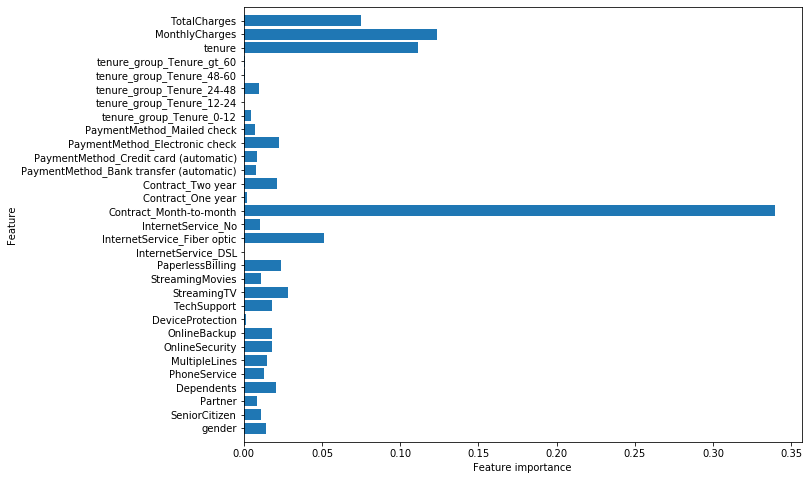

In [102]:
def plot_feature_importances_telcom(model):
    n_features = X_train_smote.shape[1]
    Id_col     = ['customerID']
    target_col = ["Churn"]
    cols    = [i for i in X_train_smote.columns if i not in Id_col+target_col]
    fearures_telcom= X_train_smote[cols]
    plt.barh(cols, model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), fearures_telcom)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances_telcom(dtree)

### Monthly charges,Contract Month to month have been picked as some of the important features for prediction as it is been suggested by the correlation plot earlier in the notebook

In [103]:
train_score_list = []
test_score_list = []
max_dep = np.arange(5, 20)

for depth in max_dep: 
    model_dtree = DecisionTreeClassifier(max_depth=depth)
    model_dtree.fit(X_train_smote,Y_train_smote)
    train_score_list.append(model_dtree.score(X_train_smote,Y_train_smote))
    test_score_list.append(model_dtree.score(X_test, y_test))

Text(0.5, 0, 'Max_Depth')

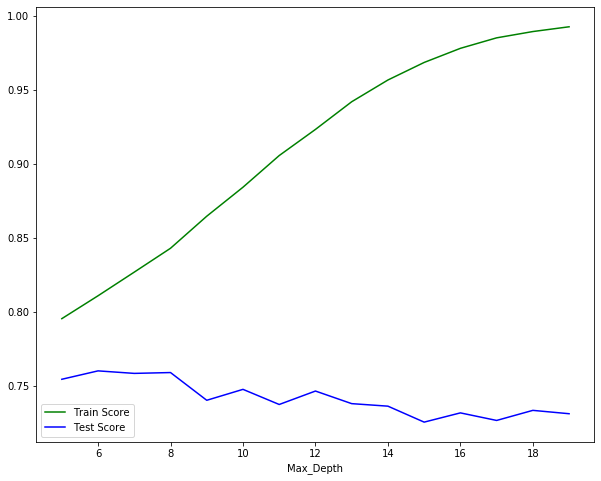

In [104]:
plt.plot(max_dep, train_score_list, c = 'g', label = 'Train Score')
plt.plot(max_dep, test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max_Depth')

### The decision tree with Max_depth as 11 clearly overfits the dataset. Eventhough it overfits the feature importance function of decision tree helped us to validate the results that we got from the initial EDA

### Classification Model Comparision:

In [122]:
df_index=['KNN','Logistic','Linear SVC','SVC Linear Kernel','SVC rbf Kernel','SVC Poly Kernel','Decision Tree']
Classification_Result=pd.DataFrame(columns=['Model_Name','Best_Parameter','Training_score','CV_Score','Testing_score','F1_score','Recall'],index=df_index)
Classification_Result['Model_Name']=Classification_Result.index

In [123]:
### Results for KNN
Classification_Result.loc['KNN']['Best_Parameter']='K=6'
Classification_Result.loc['KNN']['Training_score']=0.8637
Classification_Result.loc['KNN']['CV_Score']=0.8052
Classification_Result.loc['KNN']['Testing_score']=0.7346
Classification_Result.loc['KNN']['F1_score']=0.57
Classification_Result.loc['KNN']['Recall']=0.66

In [124]:
### Results for Logistic Regression
Classification_Result.loc['Logistic']['Best_Parameter']='C=100'
Classification_Result.loc['Logistic']['Training_score']=0.7697
Classification_Result.loc['Logistic']['CV_Score']=0.7675
Classification_Result.loc['Logistic']['Testing_score']=0.7687
Classification_Result.loc['Logistic']['F1_score']=0.65
Classification_Result.loc['Logistic']['Recall']=0.82

In [126]:
### Results for Linear SVC
Classification_Result.loc['Linear SVC']['Best_Parameter']='C=1'
Classification_Result.loc['Linear SVC']['Training_score']=0.7688
Classification_Result.loc['Linear SVC']['CV_Score']=0.7656
Classification_Result.loc['Linear SVC']['Testing_score']=0.7681
Classification_Result.loc['Linear SVC']['F1_score']=0.65
Classification_Result.loc['Linear SVC']['Recall']=0.82

In [128]:
### Results for SVC Linear Kernel
Classification_Result.loc['SVC Linear Kernel']['Best_Parameter']='C=1'
Classification_Result.loc['SVC Linear Kernel']['Training_score']=0.7640
Classification_Result.loc['SVC Linear Kernel']['CV_Score']=0.7603
Classification_Result.loc['SVC Linear Kernel']['Testing_score']=0.7539
Classification_Result.loc['SVC Linear Kernel']['F1_score']=0.64
Classification_Result.loc['SVC Linear Kernel']['Recall']=0.83

In [130]:
### Results for SVC rbf Kernel
Classification_Result.loc['SVC rbf Kernel']['Best_Parameter']='c= 100, gamma =1'
Classification_Result.loc['SVC rbf Kernel']['Training_score']=0.9691
Classification_Result.loc['SVC rbf Kernel']['CV_Score']=0.8842
Classification_Result.loc['SVC rbf Kernel']['Testing_score']=0.7636
Classification_Result.loc['SVC rbf Kernel']['F1_score']=0.51
Classification_Result.loc['SVC rbf Kernel']['Recall']=0.46

In [136]:
### Results for SVC Poly Kernel
Classification_Result.loc['SVC Poly Kernel']['Best_Parameter']='C= 100 ,degree =3'
Classification_Result.loc['SVC Poly Kernel']['Training_score']=0.9691
Classification_Result.loc['SVC Poly Kernel']['CV_Score']=0.8842
Classification_Result.loc['SVC Poly Kernel']['Testing_score']=0.7636
Classification_Result.loc['SVC Poly Kernel']['F1_score']=0.51
Classification_Result.loc['SVC Poly Kernel']['Recall']=0.46

In [137]:
### Results for Decision Tree
Classification_Result.loc['Decision Tree']['Best_Parameter']='Max_depth =11'
Classification_Result.loc['Decision Tree']['Training_score']=0.9057
Classification_Result.loc['Decision Tree']['CV_Score']=0.7936
Classification_Result.loc['Decision Tree']['Testing_score']=0.7397
Classification_Result.loc['Decision Tree']['F1_score']=0.56
Classification_Result.loc['Decision Tree']['Recall']=0.64

In [138]:
Classification_Result

,Model_Name,Best_Parameter,Training_score,CV_Score,Testing_score,F1_score,Recall
KNN,KNN,K=6,0.8637,0.8052,0.7346,0.57,0.66
Logistic,Logistic,C=100,0.7697,0.7675,0.7687,0.65,0.82
Linear SVC,Linear SVC,C=1,0.7688,0.7656,0.7681,0.65,0.82
SVC Linear Kernel,SVC Linear Kernel,C=1,0.764,0.7603,0.7539,0.64,0.83
SVC rbf Kernel,SVC rbf Kernel,"c= 100, gamma =1",0.9691,0.8842,0.7636,0.51,0.46
SVC Poly Kernel,SVC Poly Kernel,"C= 100 ,degree =3",0.9691,0.8842,0.7636,0.51,0.46
Decision Tree,Decision Tree,Max_depth =11,0.9057,0.7936,0.7397,0.56,0.64


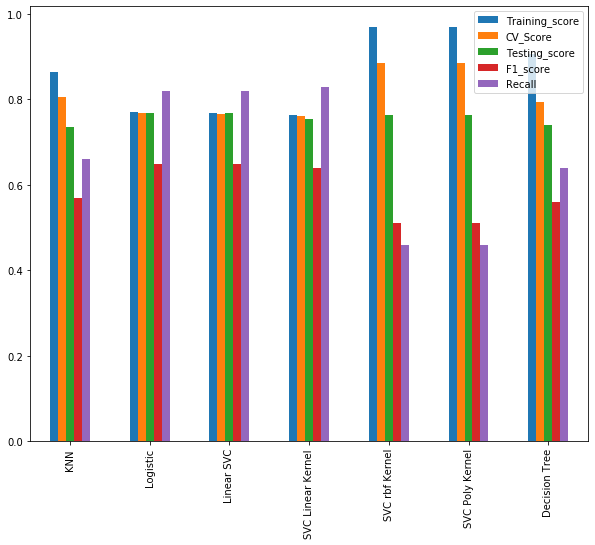

In [139]:
Classification_Result[['Training_score','CV_Score','Testing_score','F1_score','Recall']].plot(kind='bar')

### Evaluation Metric Used: High F1 score with High Recall and Better generalization(Diff between train,CV and test scores should be minimal)

#### Recall = TP/(TP+FN) ; TP --> True Positive ;  FN ---> False Negative

* High F1 score in Churn Prediction: F1 is the accuracy of the model on how many chrun and non chrun customer are actually classified correclty from the whole datapoints. High F1 score means less mis-classification.Hence this can be used as a major metric along with High Recall.
* High Recall: It is predicting more TP and Less FN. Having FN(predicting Chrun as Non Chrun leads to loosing the customer base which inturn decreases the revenue of the telcom company. Hence FN should be minimum as a result Recall will be high

### Hence the model with High F1 score along with High Recall is considered as a best model

### Best Model: Linear SVC
* Both Logistic regression and Linear SVC satisfies the above criteria but in logistic regression the Parameter C is very high when compared to Linear SVC. Small values of C give larger margin between the decision boundary and the datapoints and also better regularization. So model with less value for C should be chosen
* Hence Linear SVC is considered as a best model among all the models.